<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/Copie_de_W9_Training_Neural_Networks_with_TensorFlow_JS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lien vers la quête : https://odyssey.wildcodeschool.com/admin/quests/2012

Visualisation d'un réseau de neurones : https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.82735&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
# your code
data = boston_housing.load_data(test_split=0.2)

57026/57026 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
X_train[0].shape

(13,)

In [ ]:
# your code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(64, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

Print the model summary to get an overview of it in the cell below.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                896       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
layer_1 = (64*13) + 64
layer_2 = 64 + 1
print(layer_1, layer_2)

896 65


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
from tensorflow.keras.optimizers import Adam

# Etape de compilation
model.compile(
    optimizer=Adam(),
    loss='mse',
    metrics=['mse']
)

Fit the model on the train data. 1000 epochs should be more than enough.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
41/41 [==============================] - 8s 29ms/step - loss: 9759.0283 - mse: 9759.0283 - val_loss: 466.3377 - val_mse: 466.3377
Epoch 2/20
41/41 [==============================] - 0s 10ms/step - loss: 323.9211 - mse: 323.9211 - val_loss: 188.1400 - val_mse: 188.1400
Epoch 3/20
41/41 [==============================] - 0s 11ms/step - loss: 131.5326 - mse: 131.5326 - val_loss: 124.9265 - val_mse: 124.9265
Epoch 4/20
41/41 [==============================] - 0s 10ms/step - loss: 102.0485 - mse: 102.0485 - val_loss: 105.3678 - val_mse: 105.3678
Epoch 5/20
41/41 [==============================] - 0s 11ms/step - loss: 90.0249 - mse: 90.0249 - val_loss: 95.3935 - val_mse: 95.3935
Epoch 6/20
41/41 [==============================] - 0s 11ms/step - loss: 82.6591 - mse: 82.6591 - val_loss: 85.9707 - val_mse: 85.9707
Epoch 7/20
41/41 [==============================] - 0s 11ms/step - loss: 76.5274 - mse: 76.5274 - val_loss: 80.1497 - val_mse: 80.1497
Epoch 8/20
41/41 [===================

Finally, evaluate your model on the test data and get the score.

In [ ]:
loss, mse = model.evaluate(X_train, y_train)
print(f"Training mse: {mse}")
loss, mse = model.evaluate(X_test, y_test)
print(f"Testing mse: {mse}")

13/13 [==============================] - 0s 2ms/step - loss: 48.6121 - mse: 48.6121
Training mse: 48.61211013793945
4/4 [==============================] - 0s 3ms/step - loss: 53.9420 - mse: 53.9420
Testing mse: 53.94195556640625


Further suggestions:

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model?

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [ ]:
def plot_history(history):
    mse = history.history['mse']
    val_mse = history.history['val_mse']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(mse) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, mse, 'b', label='Training mse')
    plt.plot(x, val_mse, 'r', label='Validation mse')
    plt.title('Training and validation mse')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

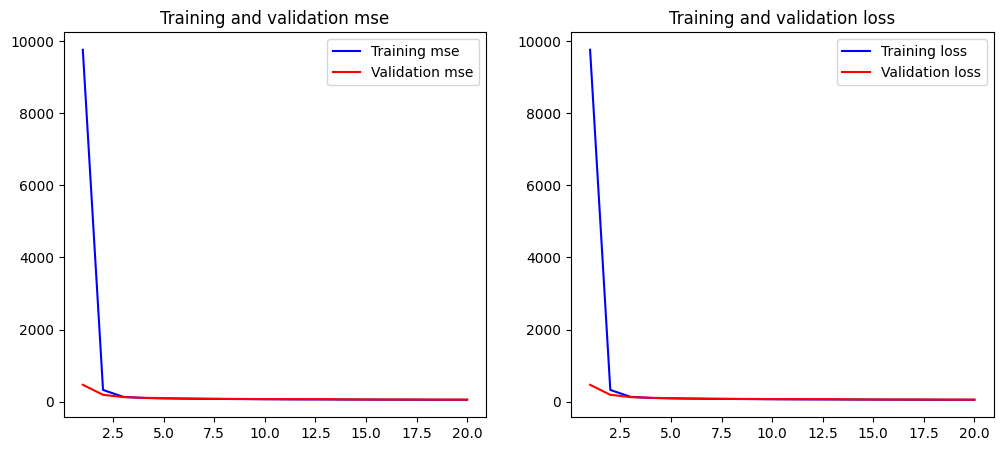

In [ ]:
plot_history(history)

On va augmenter le batch size :

Epoch 1/20
13/13 [==============================] - 1s 17ms/step - loss: 187.1612 - mse: 187.1612 - val_loss: 113.6119 - val_mse: 113.6119
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 86.1665 - mse: 86.1665 - val_loss: 70.7907 - val_mse: 70.7907
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 69.8190 - mse: 69.8190 - val_loss: 68.8960 - val_mse: 68.8960
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 70.6013 - mse: 70.6013 - val_loss: 72.6088 - val_mse: 72.6088
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 68.9595 - mse: 68.9595 - val_loss: 71.2895 - val_mse: 71.2895
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 69.3766 - mse: 69.3766 - val_loss: 70.8028 - val_mse: 70.8028
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 64.3602 - mse: 64.3602 - val_loss: 66.2442 - val_mse: 66.2442
Epoch 8/20
13/13 [==============================] - 0s 7m

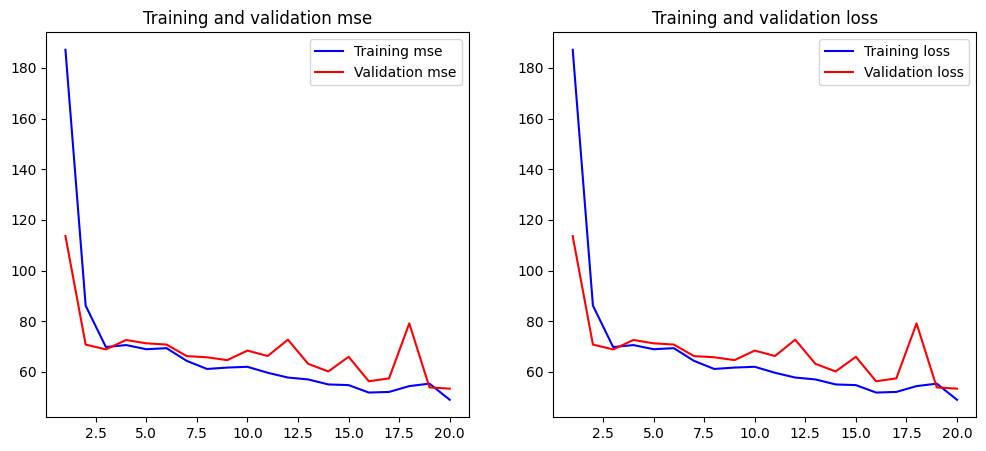

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(64, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mse']
)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

plot_history(history)

On baisse très légèrement le learning rate et on fait durer l'entrainer plus longtemps :

Epoch 1/500
13/13 [==============================] - 1s 16ms/step - loss: 340.4338 - mse: 340.4338 - val_loss: 143.2813 - val_mse: 143.2813
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 95.2436 - mse: 95.2436 - val_loss: 60.1737 - val_mse: 60.1737
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 69.7368 - mse: 69.7368 - val_loss: 57.9731 - val_mse: 57.9731
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 66.4064 - mse: 66.4064 - val_loss: 71.3842 - val_mse: 71.3842
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 63.2301 - mse: 63.2301 - val_loss: 70.6155 - val_mse: 70.6155
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 62.5750 - mse: 62.5750 - val_loss: 55.3314 - val_mse: 55.3314
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 54.2275 - mse: 54.2275 - val_loss: 52.9954 - val_mse: 52.9954
Epoch 8/500
13/13 [==============================]

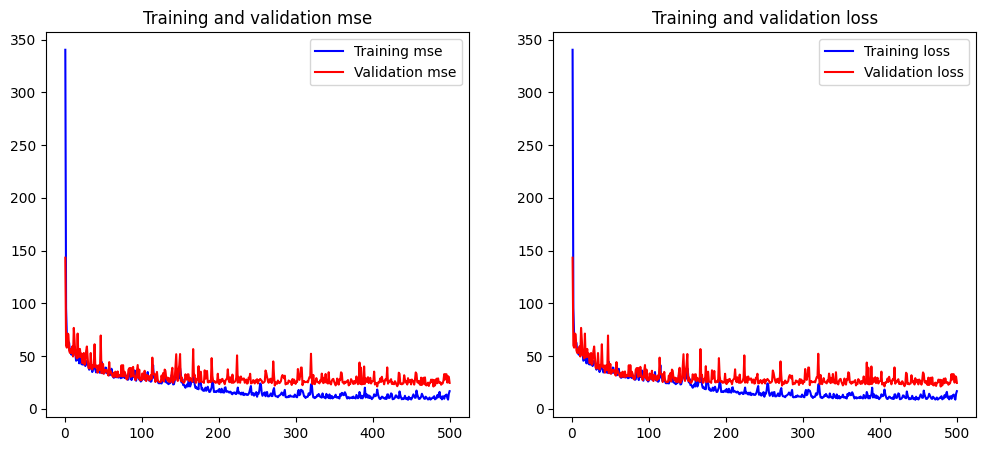

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(64, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mse']
)

history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

plot_history(history)

Essayons un modèle plus complexe avec davantage de couches et de neurones et sur moitié moins d'epochs:

Epoch 1/250
7/7 [==============================] - 2s 72ms/step - loss: 715.5976 - mse: 715.5976 - val_loss: 408.1609 - val_mse: 408.1609
Epoch 2/250
7/7 [==============================] - 0s 8ms/step - loss: 162.3169 - mse: 162.3169 - val_loss: 121.2364 - val_mse: 121.2364
Epoch 3/250
7/7 [==============================] - 0s 10ms/step - loss: 117.0819 - mse: 117.0819 - val_loss: 67.0379 - val_mse: 67.0379
Epoch 4/250
7/7 [==============================] - 0s 8ms/step - loss: 77.9106 - mse: 77.9106 - val_loss: 63.1150 - val_mse: 63.1150
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 67.1445 - mse: 67.1445 - val_loss: 66.0470 - val_mse: 66.0470
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 60.6340 - mse: 60.6340 - val_loss: 58.1830 - val_mse: 58.1830
Epoch 7/250
7/7 [==============================] - 0s 10ms/step - loss: 59.4984 - mse: 59.4984 - val_loss: 58.9710 - val_mse: 58.9710
Epoch 8/250
7/7 [==============================] - 0s 11

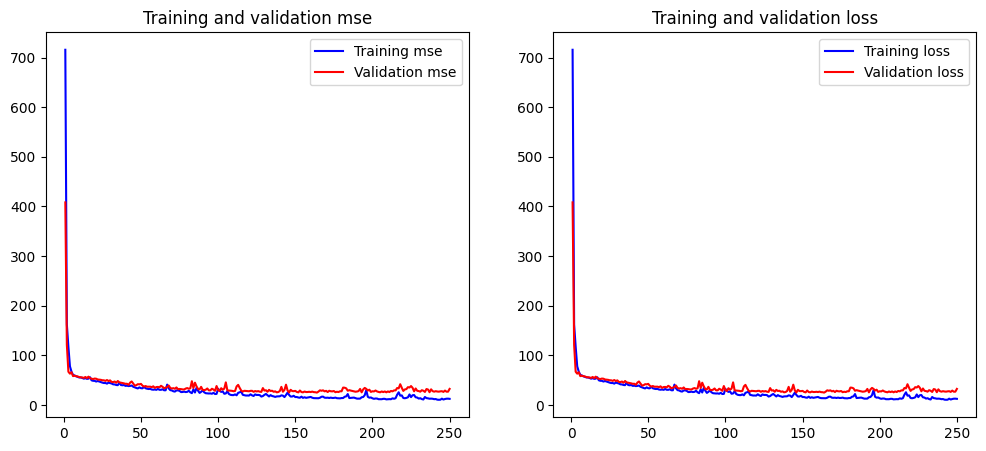

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(128, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mse']
)

history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=(X_test, y_test))

plot_history(history)

Rajoutons un peu de régularisation :

Epoch 1/250
7/7 [==============================] - 3s 33ms/step - loss: 398.6917 - mse: 398.6917 - val_loss: 98.3467 - val_mse: 98.3467
Epoch 2/250
7/7 [==============================] - 0s 11ms/step - loss: 108.2044 - mse: 108.2044 - val_loss: 90.7418 - val_mse: 90.7418
Epoch 3/250
7/7 [==============================] - 0s 8ms/step - loss: 103.0511 - mse: 103.0511 - val_loss: 64.7381 - val_mse: 64.7381
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 77.2288 - mse: 77.2288 - val_loss: 69.0775 - val_mse: 69.0775
Epoch 5/250
7/7 [==============================] - 0s 12ms/step - loss: 88.8842 - mse: 88.8842 - val_loss: 64.9384 - val_mse: 64.9384
Epoch 6/250
7/7 [==============================] - 0s 8ms/step - loss: 76.9871 - mse: 76.9871 - val_loss: 61.2628 - val_mse: 61.2628
Epoch 7/250
7/7 [==============================] - 0s 10ms/step - loss: 69.2263 - mse: 69.2263 - val_loss: 62.3406 - val_mse: 62.3406
Epoch 8/250
7/7 [==============================] - 0s 11ms

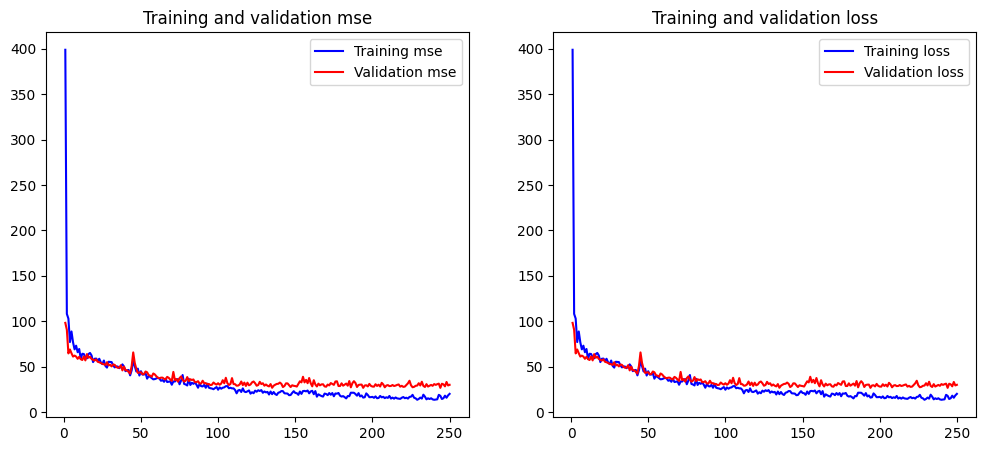

In [ ]:
model = Sequential([
    tf.keras.layers.Dense(128, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mse']
)

history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=(X_test, y_test))

plot_history(history)

Même exemple mais avec régularisation L2 :

Epoch 1/250
7/7 [==============================] - 1s 30ms/step - loss: 1827.0635 - mse: 1826.8323 - val_loss: 1047.5518 - val_mse: 1047.3240
Epoch 2/250
7/7 [==============================] - 0s 10ms/step - loss: 514.6841 - mse: 514.4582 - val_loss: 109.1938 - val_mse: 108.9708
Epoch 3/250
7/7 [==============================] - 0s 10ms/step - loss: 209.4928 - mse: 209.2716 - val_loss: 112.4799 - val_mse: 112.2615
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 107.3010 - mse: 107.0842 - val_loss: 88.6002 - val_mse: 88.3860
Epoch 5/250
7/7 [==============================] - 0s 8ms/step - loss: 69.4633 - mse: 69.2506 - val_loss: 79.0341 - val_mse: 78.8239
Epoch 6/250
7/7 [==============================] - 0s 11ms/step - loss: 72.2752 - mse: 72.0662 - val_loss: 74.0097 - val_mse: 73.8028
Epoch 7/250
7/7 [==============================] - 0s 8ms/step - loss: 63.3627 - mse: 63.1571 - val_loss: 64.5294 - val_mse: 64.3255
Epoch 8/250
7/7 [=============================

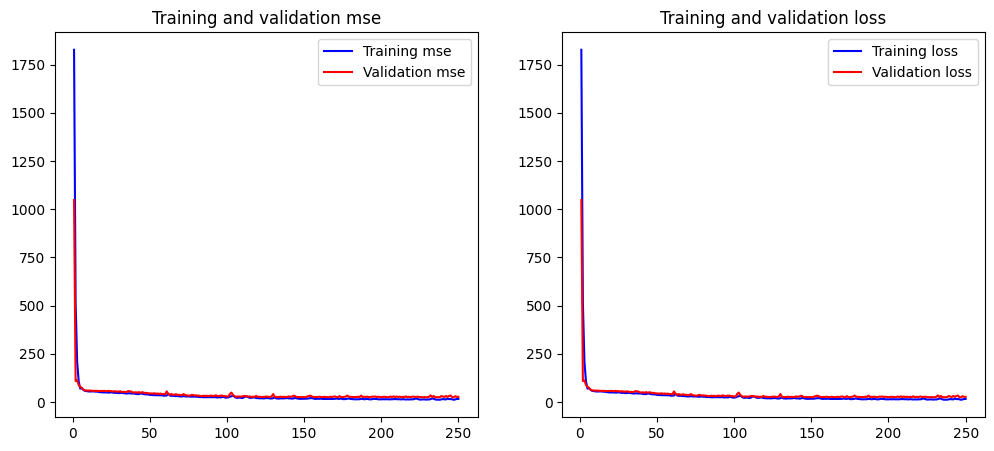

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    tf.keras.layers.Dense(128, input_shape=(13,), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.0008),
    loss='mse',
    metrics=['mse']
)

history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=(X_test, y_test))

plot_history(history)